# Part 01

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
Ntr = x_train.shape[0] # number of training examples
Nte = x_test.shape[0] # number of testing examples
Din = 3072 # By CIFAR10 data set with 32 x 32 x 3 color images

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)

#This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of
#the input vector and number of columns equal to the number of classes.

y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#reshape/flatten the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


In [4]:
batch_size = Ntr # for gradient descent optimization batch size is equal to number of training set
iterations = 300
# epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay= 0.999
reg = 5e-6 #the regularization constant - lamda

In [8]:
loss_history_test = []
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

std=1e-5 # standard deviation of normal distributaion
w1 = std*np.random.randn(Din, K) # initialize the w matrix with random values
b1 = np.zeros(K)

for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    #forward 
    y_pred = x.dot(w1) + b1
    y_pred_test = x_test.dot(w1) + b1
    
    loss_test = (1/Nte)*(np.square(y_test - y_pred_test)).sum() + reg*(np.sum(w1*w1))
    loss_history_test.append(loss_test)
    loss = (1/batch_size)*(np.square(y - y_pred)).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history.append(training_acc)
    val_acc_history.append(testing_acc)

    if t%10 == 0:
        print("iteration %d / %d| training loss %f| testing loss %f training accuracy %f| testing accuracy %f" % (t, iterations, loss, loss_test, training_acc, testing_acc))
    # Backward 
    dy_pred = (1./batch_size)*2.0*(y_pred-y) # partial derivative w.r.t y_predicted
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    #updating learning parameters
    w1 -= lr*dw1 
    b1 -= lr*db1
    lr *= lr_decay
    
    lr_history.append(lr)

iteration 0 / 300| training loss 0.999999| testing loss 0.999993 training accuracy 68.065800| testing accuracy 68.157000
iteration 10 / 300| training loss 0.876199| testing loss 0.876111 training accuracy 75.460000| testing accuracy 75.826000
iteration 20 / 300| training loss 0.842958| testing loss 0.842484 training accuracy 76.109200| testing accuracy 76.728000
iteration 30 / 300| training loss 0.824544| testing loss 0.823809 training accuracy 76.569400| testing accuracy 76.993000
iteration 40 / 300| training loss 0.813301| testing loss 0.812803 training accuracy 76.987400| testing accuracy 77.299000
iteration 50 / 300| training loss 0.805174| testing loss 0.806100 training accuracy 77.123000| testing accuracy 77.263000
iteration 60 / 300| training loss 0.801182| testing loss 0.801896 training accuracy 77.192600| testing accuracy 77.315000
iteration 70 / 300| training loss 0.797038| testing loss 0.798867 training accuracy 77.159600| testing accuracy 77.212000
iteration 80 / 300| train

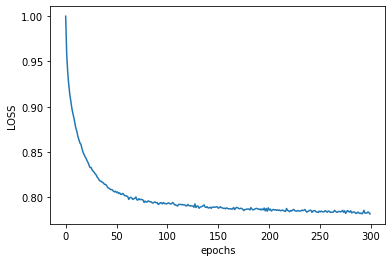

In [9]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

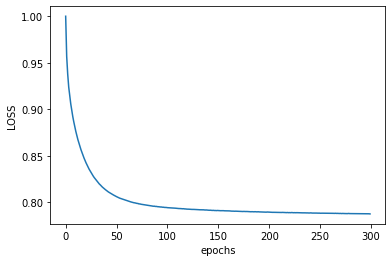

In [10]:
fig, axes = plt.subplots()
axes.plot(loss_history_test)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('testing_loss.png',transparent=True)

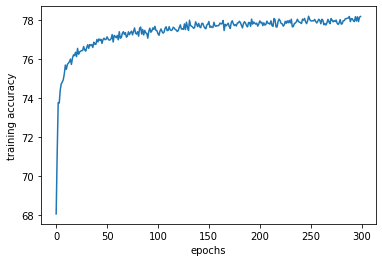

In [13]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
plt.show()
fig.savefig('training accuracy.png',transparent=True)

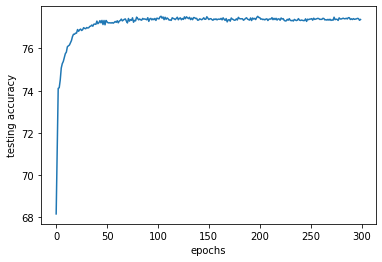

In [14]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("testing accuracy")
plt.show()
fig.savefig('testing accuracy.png',transparent=True)

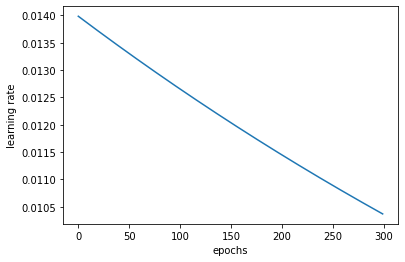

In [15]:
fig, axes = plt.subplots() 
axes.plot(lr_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("learning rate")
plt.show()
fig.savefig('learning rate.png',transparent=True)

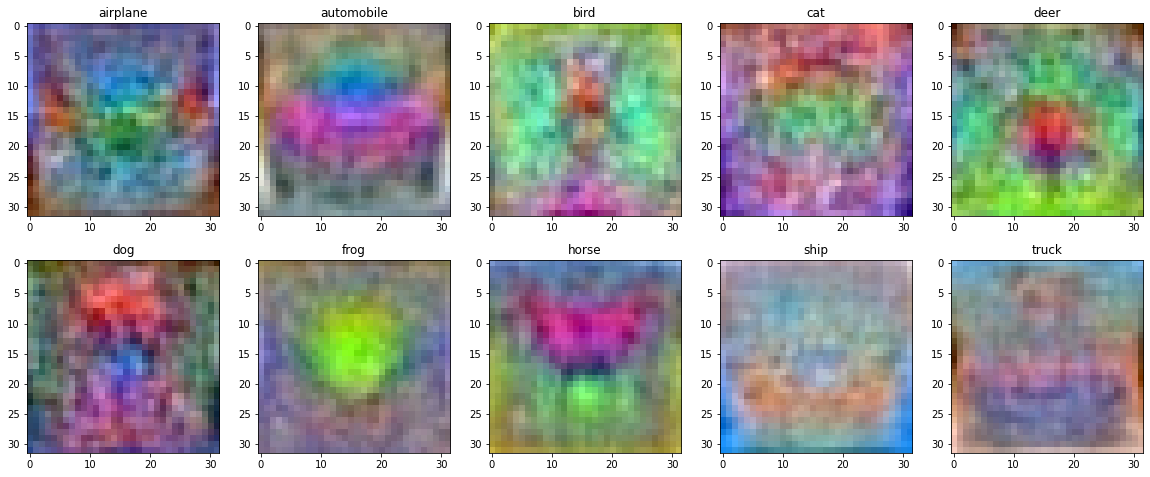

In [16]:
imgs_for_w1=[]
titles_of_imgs = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w1.shape[1]):
    temp = np.reshape(w1[:,i]*255,(32,32,3))
    temp = cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    imgs_for_w1.append(temp)
fig,ax = plt.subplots(2,5,figsize=(20,8))
# show resultant image as a type of 2 x 5 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(imgs_for_w1[i*5+j], vmin=0, vmax=255)
        ax[i,j].set_title(titles_of_imgs[i*5+j])
plt.show()
fig.savefig('img_for_w1',transparent=True)